In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original = pd.read_csv("data (project).csv", encoding= 'unicode_escape')

In [3]:
df_original

,job_title,hh_title,age,salary,exp. period,title of exp.
0,data analyst,Data analyst,22.0,NaN,2.67,Data Analyst
1,data analyst,Data Analyst,21.0,NaN,0.83,Junior Data Analyst
2,data analyst,Data Analyst,30.0,NaN,7.50,Data Analyst
3,data analyst,Data Analyst,24.0,NaN,4.92,Data Analyst
4,data analyst,Data Analyst,27.0,450000.0,3.25,Business Intelligence Analyst
...,...,...,...,...,...,...
995,sql,Ïðîãðàììèñò ðàçðàáîò÷èê ýêñïåðò ïî âíåäðåíèþ ...,51.0,NaN,25.42,Ãëàâíûé ñïåöèàëèñò Îòäåëà ïåðñïåêòèâíûõ òåõíîë...
996,sql,Ïðîãðàììèñò-ðàçðàáîò÷èê,22.0,NaN,1.58,Full Stack
997,sql,Ïðîãðàììèñò c# .Net Core ASP.Net Core .Net ...,42.0,NaN,9.33,BackEnd Developer .Net C#
998,sql,Python SQL R Data Science Statistics AI Machin...,NaN,NaN,16.08,Study Scientific Leader Data Science and Adva...


In [4]:
df= df_original.copy()

In [5]:
df.pop('hh_title')
df.pop('title of exp.')

0                                           Data Analyst
1                                    Junior Data Analyst
2                                           Data Analyst
3                                           Data Analyst
4                          Business Intelligence Analyst
                             ...                        
995    Ãëàâíûé ñïåöèàëèñò Îòäåëà ïåðñïåêòèâíûõ òåõíîë...
996                                           Full Stack
997                            BackEnd Developer .Net C#
998    Study Scientific Leader  Data Science and Adva...
999                             Technical Support Intern
Name: title of exp., Length: 1000, dtype: object

In [6]:
df

,job_title,age,salary,exp. period
0,data analyst,22.0,NaN,2.67
1,data analyst,21.0,NaN,0.83
2,data analyst,30.0,NaN,7.50
3,data analyst,24.0,NaN,4.92
4,data analyst,27.0,450000.0,3.25
...,...,...,...,...
995,sql,51.0,NaN,25.42
996,sql,22.0,NaN,1.58
997,sql,42.0,NaN,9.33
998,sql,NaN,NaN,16.08


In [7]:
y= df['job_title']

In [8]:
x=df.copy()
x.pop('job_title')

0      data analyst
1      data analyst
2      data analyst
3      data analyst
4      data analyst
           ...     
995             sql
996             sql
997             sql
998             sql
999             sql
Name: job_title, Length: 1000, dtype: object

In [9]:
x['age'] = x['age'].fillna(value = x['age'].mean())
x['exp. period'] = x['exp. period'].fillna(value = x['exp. period'].mean())
x['salary'] = x['salary'].fillna(value = x['salary'].mean())

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data, test_data, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
 from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()

In [14]:
modelGauss = model.fit(train_data, y_train)

In [15]:
score = modelGauss.score(train_data, y_train)

In [16]:
score

0.31125

In [17]:
score = modelGauss.score(test_data, y_test)

In [18]:
score

0.355

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
score_gauss = cross_val_score(GaussianNB(), x, y, cv=10)
print(score_gauss)
print("Avg :",np.average(score_gauss))

[0.24 0.33 0.24 0.33 0.24 0.33 0.24 0.33 0.24 0.33]
Avg : 0.28500000000000003


In [21]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as kNN

In [22]:
model = kNN(n_neighbors=3)
model.fit(train_data, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
score = model.score(train_data, y_train)

In [24]:
score

0.86625

In [25]:
score = model.score(test_data, y_test)

In [26]:
score

0.81

In [27]:
score_knn = cross_val_score(kNN(n_neighbors=3), x, y, cv=10)
print(score_knn)
print("Avg :",np.average(score_knn))

[0.82 0.88 0.8  0.87 0.82 0.88 0.82 0.89 0.82 0.85]
Avg : 0.8450000000000001


# MY DATASET

In [107]:
df = pd.read_csv("salary.csv")


In [108]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [109]:
df.pop('marital-status')
df.pop('occupation')
df.pop('relationship')
df.pop('native-country')


0         United-States
1         United-States
2         United-States
3         United-States
4                  Cuba
              ...      
32556     United-States
32557     United-States
32558     United-States
32559     United-States
32560     United-States
Name: native-country, Length: 32561, dtype: object

In [110]:
a=[]
for i in df['salary']:
    if i == " <=50K":
        a.append(1)
    else:
        a.append(2)
        

In [111]:
df['Salary_Class']= a

In [112]:
df.pop('salary')

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: salary, Length: 32561, dtype: object

In [113]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [114]:
df['workclass']=df['workclass'].map({' State-gov': 0, ' Self-emp-not-inc': 1, ' Federal-gov': 4, ' Private': 3, ' Local-gov': 5, ' ?': 6, ' Self-emp-inc': 7, ' Without-pay': 8, ' Never-worked': 9,})

In [115]:
df['workclass']

0        0
1        1
2        3
3        3
4        3
        ..
32556    3
32557    3
32558    3
32559    3
32560    7
Name: workclass, Length: 32561, dtype: int64

In [116]:
df['education']=df['education'].map({' Bachelors': 0, ' HS-grad': 1, ' 11th': 4, ' Masters': 3, ' 9th': 5, ' Some-college': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' 7th-8th': 9, ' Doctorate': 10, ' Prof-school': 11, ' 5th-6th': 12, ' 10th': 13, ' 1st-4th': 14, ' Preschool': 15, ' 12th': 16})

In [117]:
df['race']=df['race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 4, ' Amer-Indian-Eskimo': 3, ' Other': 5})

In [118]:
df['race']

0        0
1        0
2        0
3        1
4        1
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: race, Length: 32561, dtype: int64

In [119]:
df['sex']=df['sex'].map({' Male': 0, ' Female': 1})

In [120]:
df

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
0,39,0,77516,0,13,0,0,2174,0,40,1
1,50,1,83311,0,13,0,0,0,0,13,1
2,38,3,215646,1,9,0,0,0,0,40,1
3,53,3,234721,4,7,1,0,0,0,40,1
4,28,3,338409,0,13,1,1,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,0,1,0,0,38,1
32557,40,3,154374,1,9,0,0,0,0,40,2
32558,58,3,151910,1,9,0,1,0,0,40,1
32559,22,3,201490,1,9,0,0,0,0,20,1


In [69]:
y=df['Salary_Class']

In [70]:
x=df.copy()

In [71]:
x.pop('Salary_Class')

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name: Salary_Class, Length: 32561, dtype: int64

In [72]:
x

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week
0,39,0,77516,0,13,0,0,2174,0,40
1,50,1,83311,0,13,0,0,0,0,13
2,38,3,215646,1,9,0,0,0,0,40
3,53,3,234721,4,7,1,0,0,0,40
4,28,3,338409,0,13,1,1,0,0,40
...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,0,1,0,0,38
32557,40,3,154374,1,9,0,0,0,0,40
32558,58,3,151910,1,9,0,1,0,0,40
32559,22,3,201490,1,9,0,0,0,0,20


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
train_data, test_data, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [75]:
 from sklearn.naive_bayes import GaussianNB

In [76]:
model = GaussianNB()

In [77]:
modelGauss = model.fit(train_data, y_train)

In [ ]:
score = modelGauss.score(train_data, y_train)

In [78]:
score

0.81

In [79]:
score = modelGauss.score(test_data, y_test)

In [80]:
score

0.7933364041148472

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
score_gauss = cross_val_score(GaussianNB(), x, y, cv=10)
print(score_gauss)
print("Avg :",np.average(score_gauss))

[0.79152594 0.79637592 0.78931204 0.79391892 0.79514742 0.8022113
 0.78501229 0.79821867 0.79484029 0.8046683 ]
Avg : 0.7951231103825516


In [83]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as kNN

In [84]:
neigh = kNN(n_neighbors=3)
neigh.fit(train_data, y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
score = neigh.score(train_data, y_train)

In [86]:
score

0.8657862407862408

In [87]:
score = neigh.score(test_data, y_test)

In [88]:
score

0.7549516351911562

In [89]:
score_knn = cross_val_score(kNN(n_neighbors=3), x, y, cv=10)
print(score_knn)
print("Avg :",np.average(score_knn))

[0.76051581 0.75890663 0.76167076 0.76719902 0.75982801 0.76074939
 0.75982801 0.76136364 0.75982801 0.76474201]
Avg : 0.7614631291212501


In [97]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(criterion = 'gini', n_estimators = 200)
RandomForest.fit(train_data, y_train)

RandomForestClassifier(n_estimators=200)

In [98]:
importances = RandomForest.feature_importances_

In [100]:
indices = np.argsort(importances)[::-1]
names = [train_data.columns.values[i] for i in indices]

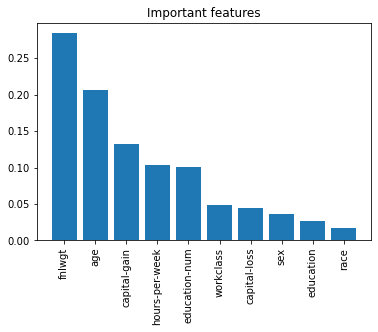

In [102]:
plt.figure()

# Title
plt.title("Important features")

# Bar
plt.bar(range(train_data.shape[1]), importances[indices])

# x Axes names
plt.xticks(range(train_data.shape[1]), names, rotation=90)

# Show
plt.show ()

In [121]:
black_people=df[df['race']==1]

In [125]:
black_people[black_people['Salary_Class']==1]

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
3,53,3,234721,4,7,1,0,0,0,40,1
4,28,3,338409,0,13,1,1,0,0,40,1
6,49,3,160187,5,5,1,1,0,0,16,1
13,32,3,205019,7,12,1,0,0,0,50,1
21,54,3,302146,1,9,1,1,0,0,20,1
...,...,...,...,...,...,...,...,...,...,...,...
32514,40,3,142657,8,11,1,0,0,0,45,1
32521,33,3,273243,1,9,1,0,0,0,40,1
32535,22,3,325033,16,8,1,0,0,0,35,1
32537,30,3,345898,1,9,1,0,0,0,46,1


In [126]:
white_people=df[df['race']==0]

In [127]:
white_people[white_people['Salary_Class']==1]

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
0,39,0,77516,0,13,0,0,2174,0,40,1
1,50,1,83311,0,13,0,0,0,0,13,1
2,38,3,215646,1,9,0,0,0,0,40,1
5,37,3,284582,3,14,0,1,0,0,40,1
12,23,3,122272,0,13,0,1,0,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...
32552,43,3,84661,8,11,0,0,0,0,45,1
32555,22,3,310152,6,10,0,0,0,0,40,1
32556,27,3,257302,7,12,0,1,0,0,38,1
32558,58,3,151910,1,9,0,1,0,0,40,1


In [128]:
black_people[black_people['Salary_Class']==2]

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
10,37,3,280464,6,10,1,0,0,0,80,2
45,57,4,337895,0,13,1,0,0,0,40,2
117,49,5,197371,8,11,1,0,0,0,40,2
180,44,5,181344,6,10,1,0,0,0,38,2
206,36,3,128757,0,13,1,0,7298,0,36,2
...,...,...,...,...,...,...,...,...,...,...,...
31745,57,4,62020,11,15,1,0,0,0,55,2
31795,58,5,311409,3,14,1,0,7688,0,30,2
31842,42,3,402367,6,10,1,0,7688,0,45,2
31998,52,6,89951,16,8,1,1,0,0,40,2


In [129]:
white_people[white_people['Salary_Class']==2]

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
7,52,1,209642,1,9,0,0,0,0,45,2
8,31,3,45781,3,14,0,1,14084,0,50,2
9,42,3,159449,0,13,0,0,5178,0,40,2
19,43,1,292175,3,14,0,1,0,0,45,2
20,40,3,193524,10,16,0,0,0,0,60,2
...,...,...,...,...,...,...,...,...,...,...,...
32539,71,6,287372,10,16,0,0,0,0,10,2
32545,39,5,111499,7,12,0,1,0,0,20,2
32554,53,3,321865,3,14,0,0,0,0,40,2
32557,40,3,154374,1,9,0,0,0,0,40,2


In [130]:
white_people

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
0,39,0,77516,0,13,0,0,2174,0,40,1
1,50,1,83311,0,13,0,0,0,0,13,1
2,38,3,215646,1,9,0,0,0,0,40,1
5,37,3,284582,3,14,0,1,0,0,40,1
7,52,1,209642,1,9,0,0,0,0,45,2
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,0,1,0,0,38,1
32557,40,3,154374,1,9,0,0,0,0,40,2
32558,58,3,151910,1,9,0,1,0,0,40,1
32559,22,3,201490,1,9,0,0,0,0,20,1


In [131]:
black_people

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,Salary_Class
3,53,3,234721,4,7,1,0,0,0,40,1
4,28,3,338409,0,13,1,1,0,0,40,1
6,49,3,160187,5,5,1,1,0,0,16,1
10,37,3,280464,6,10,1,0,0,0,80,2
13,32,3,205019,7,12,1,0,0,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...
32521,33,3,273243,1,9,1,0,0,0,40,1
32535,22,3,325033,16,8,1,0,0,0,35,1
32537,30,3,345898,1,9,1,0,0,0,46,1
32538,38,3,139180,0,13,1,1,15020,0,45,2


In [132]:
27816/3124 

8.903969270166453

In [133]:
7117/387 

18.39018087855297

In [134]:
20699/2737 

7.562659846547315